## Introduction to Scikit-Learn (sklearn)

This notebook demonstarte some of the most useful funtions of the beautiful sctkit-learn liabary

What we are going to cover 


0. An end-to-end scikit learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problem
3. Fit the model/algorithm and use it to make predictions
4. Evaluate a model
5. Improve the model
6. Save and load a trained model
7. Putting it all together

## 0. An end-to-end Scikit-Learn workflow

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1. Get the data ready
import pandas as pd
heart_disease= pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Craete X (features matrix)
X = heart_disease.drop("target", axis=1)

# Craete y (labels)
y = heart_disease["target"]

In [4]:
# let view our features
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Choose the right model and hyperparameters



In [6]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()

# we'll  keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
import sklearn

sklearn.show_versions()


System:
    python: 3.10.4 (main, Jun 29 2022, 12:14:53) [GCC 11.2.0]
executable: /usr/bin/python3
   machine: Linux-5.15.0-46-generic-x86_64-with-glibc2.35

Python dependencies:
      sklearn: 1.1.2
          pip: 22.0.2
   setuptools: 59.6.0
        numpy: 1.23.0
        scipy: 1.8.0
       Cython: None
       pandas: 1.4.3
   matplotlib: 3.5.1
       joblib: 1.1.0
threadpoolctl: 3.1.0

Built with OpenMP: True

threadpoolctl info:
       user_api: blas
   internal_api: openblas
         prefix: libopenblas
       filepath: /home/olowu/.local/lib/python3.10/site-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
        version: 0.3.20
threading_layer: pthreads
   architecture: Sandybridge
    num_threads: 4

       user_api: openmp
   internal_api: openmp
         prefix: libgomp
       filepath: /usr/lib/x86_64-linux-gnu/libgomp.so.1.0.0
        version: None
    num_threads: 4

       user_api: openmp
   internal_api: openmp
         prefix: libgomp
       filepath: /home/olo

In [8]:
# 3. Fit the model to the training data
# let split our data into train and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

In [9]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,62,0,0,138,294,1,1,106,0,1.9,1,3,2
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2


In [10]:
# let fit the data
clf.fit(x_train, y_train);

In [11]:
# let make prediction
clf.predict(np.array([0, 2, 3, 4]))

/home/olowu/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Note 
we can only predict on the same type of data a model is trained on

In [12]:
# Let make prediction on our test data
y_preds= clf.predict(x_test)

In [13]:
y_preds

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1])

In [14]:
y_test

60     1
260    0
63     1
203    0
103    1
      ..
157    1
217    0
108    1
233    0
36     1
Name: target, Length: 61, dtype: int64

In [15]:
# 4. Evaluate the model
clf.score(x_train, y_train)
# looks like our model has 100% score on the training dataset

1.0

In [16]:
# Evaluste on the test dataset
clf.score(x_test, y_test)

0.8360655737704918

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [18]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.79      0.81        28
           1       0.83      0.88      0.85        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [19]:
confusion_matrix(y_test, y_preds)

array([[22,  6],
       [ 4, 29]])

In [20]:
accuracy_score(y_test, y_preds)

0.8360655737704918

In [21]:
# 5. Improve the model
# Try diffrent amount of n_estimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Training model with {i} estimator...")
    clf= RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accracy on test data: {clf.score(x_test, y_test) *100:.2f}%")
    print("")

Training model with 10 estimator...
Model accracy on test data: 80.33%

Training model with 20 estimator...
Model accracy on test data: 85.25%

Training model with 30 estimator...
Model accracy on test data: 86.89%

Training model with 40 estimator...
Model accracy on test data: 86.89%

Training model with 50 estimator...
Model accracy on test data: 86.89%

Training model with 60 estimator...
Model accracy on test data: 85.25%

Training model with 70 estimator...
Model accracy on test data: 86.89%

Training model with 80 estimator...
Model accracy on test data: 88.52%

Training model with 90 estimator...
Model accracy on test data: 88.52%



In [22]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))
# wb write binary

In [23]:
# let load the saved model
loaded_model=pickle.load(open("random_forest_model_1.pkl", "rb"))
# rb read bianary
loaded_model.score(x_test, y_test)

0.8852459016393442

## 1. Getting  our data ready to be used with machine learning

Three main things we have to do:


1. Split the data into feature and lables (usually `x` and `y`)

2. Filling (also called imputting( or disregarding missing values

3. Converting non_numerical values to numerical values (also called feature encoding)

In [24]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [25]:
x= heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
y= heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [27]:
# Split the data into train and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [28]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [29]:
x.shape

(303, 13)

In [30]:
len(heart_disease)

303

In [31]:
len(heart_disease) * (0.8)

242.4

In [32]:
heart_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [33]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 1.1 Make sure it all numerical

In [34]:
car_sales= pd.read_csv("data/car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [35]:
len(car_sales)

1000

In [36]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [37]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

`Note :` we have to convert non numerical column to numerical but b4 we do that on this dataset, let try and build a model around it first

In [38]:
# Split the data into x/y

x= car_sales.drop("Price", axis=1)
y= car_sales["Price"]

# Spilt into traning and test
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                   test_size=0.2)


In [39]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor()

# let fit the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [40]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [41]:
# Turh the categorical into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder="passthrough")

transformed_x= transformer.fit_transform(x)

In [42]:
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [43]:
# let pass our transformed_x into a pandas dataframe
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [44]:
# another way to do this is to use the pandas get dummies
dummies=pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [45]:
# Let's refit the model
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(transformed_x,
                                                   y,
                                                   test_size=0.2)


# Let fit the model
model.fit(x_train, y_train)

RandomForestRegressor()

In [46]:
# let evalute it
model.score(x_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

How to haddle missing dataset

1. Fill them with some value (alsp know as imputation)
2. Remove the sample with the missing data altogether

In [47]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [48]:
car_sales_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Make           951 non-null    object 
 1   Colour         950 non-null    object 
 2   Odometer (KM)  950 non-null    float64
 3   Doors          950 non-null    float64
 4   Price          950 non-null    float64
dtypes: float64(3), object(2)
memory usage: 39.2+ KB


In [49]:
# to see if we have na
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [50]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [51]:
# let split our data into X and y
X= car_sales_missing.drop("Price", axis=1)
y= car_sales_missing["Price"]

X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


In [52]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [53]:
# Turh the categorical into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder="passthrough")

transformed_x= transformer.fit_transform(X)

In [54]:
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

####  Option1: Fill missing data with Pandas 


In [55]:
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [56]:
car_sales_missing["Doors"].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [57]:
# Fill the Make column
car_sales_missing["Make"].fillna("missing", inplace=True)

# Fill the color colume
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the odometer column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)

# fill the door column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [58]:
# Check our car sales data again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [59]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [60]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [61]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [62]:
len(car_sales_missing)

950

In [63]:
x= car_sales_missing.drop("Price", axis=1)
y= car_sales_missing["Price"]

In [64]:
# Turh the categorical into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder="passthrough")

transformed_x= transformer.fit_transform(car_sales_missing)

In [65]:
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### OPtion 2: Fill missing values with sci-kit-learn


In [66]:
car_sales_missing= pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [67]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [68]:
# Let first drop the data that those not as price cause we can't work with that type of data
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [69]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [70]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [71]:
# Split into x and y
x= car_sales_missing.drop("Price", axis=1)
y= car_sales_missing["Price"]

In [72]:
# Fill missing value with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill the categories values with the missing & numerical value with mean
cat_imputer= SimpleImputer(strategy="constant", fill_value="missing")
door_imputer= SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_feature),
])

# Transform the data
filled_x= imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [73]:
# let create a nnew dataframe
car_sales_filled= pd.DataFrame(filled_x,
                              columns=["Make", "Colour", "Doors", "Odometer (KM)"])

car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [74]:
# Let check if the is still missing value
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [75]:
# Turh the categorical into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder="passthrough")

transformed_x= transformer.fit_transform(car_sales_filled)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [76]:
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [77]:
# Now we've got our data as number and filled (no missing value) 
# Let's fill a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(transformed_x, y,
                                                  test_size=0.2)

model= RandomForestRegressor()

# Let fit the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

In [78]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Chossing the right estimator/ algorithm for your problem

Some things to note:
    
* Sklearn refers to machine learning models,a lgorithm as estimators
* Classification problem - prediction a category (heart disease or not)
     * Sometimes you'll see `clf` (short for classifier) used as a classification estimator
* Regression problem- prediction a number (selling price of a car)

if you are working on a machine learning problem and looking for to use sklearn and you are not sure what model you should use,
refer to the sklearn machine learning map
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

let's use the califonia Hosing dataset

In [79]:
# Get californial Housing Dataset
from sklearn.datasets import fetch_california_housing
housing= fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [80]:
housing_df= pd.DataFrame(housing["data"],
                        columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [81]:
len(housing["target"])

20640

In [82]:
housing["target_names"][:10]

['MedHouseVal']

In [83]:
housing["feature_names"]

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [84]:
housing["target"]

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [85]:
housing_df["MedHouseVal"]= housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [86]:
housing_df["Target"]= housing["target"]
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [87]:
housing_df.drop("MedHouseVal", axis=1, inplace=True)

In [88]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [89]:
# Import algorithim
from sklearn.linear_model import Ridge

#Setup  random seed 
np.random.seed(42)

# Create the data
x= housing_df.drop("Target", axis=1)
y= housing_df["Target"] # median house p;rice in $100,000s

# Split into train and test
x_train, x_test, y_train, y_test=train_test_split(x , y , 
                                                 test_size=0.2)

# Instantiate and fit the model (on the traning set)
model=Ridge()
model.fit(x_train, y_train)

# Check the score of our model (on the test set)
model.score(x_test, y_test)

0.575854961144012

Let try another model to see if we can improve on it acccuracy

https://scikit-learn.org/stable/modules/ensemble.html

In [90]:
# Importing the algorithm
from sklearn import svm

model_1= svm.SVR()

In [91]:
model_1.fit(x_train, y_train)
# let score our model
model_1.score(x_test, y_test)

-0.016485360107173497

this is not working cause our lables is continious to know more about it read 

https://www.statology.org/valueerror-unknown-label-type-continuous/

What if `Ridge` didn't work or the score didn't fit our needs?

Well, we could always try a diffrent model

How abou we try an ensemble model (an ensamble is combination of smaler models to try and make predictions better than a single model)

Sklearn's ensamble model can be find here : https://scikit-learn.org/stable/modules/ensemble.html

In [92]:
# Import the RandomForestRegressor model class from the ensamble model
from sklearn.ensemble import RandomForestRegressor

# Setup random seed 
np.random.seed(42)

# Create  x and y
x= housing_df.drop("Target", axis=1)
y= housing_df["Target"]

# Split into traim and test
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2)

# crete the model
model_2= RandomForestRegressor()

# fit the model
model_2.fit(x_train, y_train)

# let score our model
model_2.score(x_test, y_test)


0.8066196804802649

## 2.2 Picking a machine learning model for classification data

In [93]:
# let load our heart disease model
heart_disease= pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [94]:
len(heart_disease)

303

Consuiting the map and it says to try `linearSVC`

In [95]:
# Import the LinearSVC model class from the ensamble model
from sklearn.svm import LinearSVC
# Setup random seed 
np.random.seed(42)

# Create  x and y
x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split into traim and test
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2)

# crete the model
clf= LinearSVC(verbose=10)

# fit the model
clf.fit(x_train, y_train)

# let score our model
clf.score(x_test, y_test)


[LibLinear]....................................................................................................
optimization finished, #iter = 1000

Using -s 2 may be faster (also see FAQ)

Objective value = -1.366210
nSV = 228


/home/olowu/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [96]:
# Import the RandomForestClassifier model class from the ensamble model
from sklearn.ensemble import RandomForestClassifier
# Setup random seed 
np.random.seed(42)

# Create  x and y
x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split into traim and test
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2)

# crete the model
clf= RandomForestClassifier()

# fit the model
clf.fit(x_train, y_train)

# let score our model
clf.score(x_test, y_test)


0.8524590163934426

Tidbit:
  1. If we have stuctured data, use ensemble method
  2. if you have unstructured data, use deep learning or transfer

## 3. Fit the model/algorithim on our data and use it to make predection


### 3.1 Fitting the model on the data

* x= features, features variables, data

* y= labels, targets, target variables

In [97]:
# Import the RandomForestClassifier model class from the ensamble model
from sklearn.ensemble import RandomForestClassifier
# Setup random seed 
np.random.seed(42)

# Create  x and y
x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Split into traim and test
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2)

# crete the model
clf= RandomForestClassifier()

# fit the model to the data (training the machine learning model)
clf.fit(x_train, y_train)

# let score our model
clf.score(x_test, y_test)


0.8524590163934426

In [98]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [99]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3. 2 Making prediction using a machine learning model

2 Ways to make prediction

1. `predict()`    
2. `predict_probs()`

In [100]:
# use a trained model to make prediction

clf.predict(np.array([1, 7, 8, 3, 4])) # this doesn't work

/home/olowu/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [101]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [102]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [103]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [104]:
# Compare predictions to true lable to evaluate the model
y_preds= clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [105]:
clf.score(x_test, y_test)

0.8524590163934426

In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

### Make prediction with predict_proba()



In [107]:
# predict_proba() returns probabilities of a classification lable
clf.predict_proba(x_test)

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53],
       [0.26, 0.74],
       [0.7 , 0.3 ],
       [0.11, 0.89],
       [0.95, 0.05],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.84, 0.16],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.38, 0.62],
       [0.29, 0.71],
       [0.26, 0.74],
       [0.34, 0.66],
       [0.2 , 0.8 ],
       [0.22, 0.78],
       [0.83, 0.17],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.46, 0.54],
       [0.89, 0.11],
       [0.44, 0.56],
       [0.16, 0.84],
       [0.33, 0.67],
       [0.08, 0.92],
       [0.13, 0.87],
       [0.17, 0.83],
       [0.18, 0.82],
       [0.38, 0.62],
       [0.32, 0.68],
       [0.77, 0.23],
       [0.39, 0.61],
       [0.  ,

In [108]:
clf.predict_proba(x_test)[:5]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [109]:
# Let's predict() on the same data...
clf.predict(x_test)[:5]

array([0, 1, 1, 0, 1])

In [110]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

`predict()` can also be used for regression models

In [111]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [112]:
# Let build a model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# let set random seed
np.random.seed(42)

# let split our data into features and lables 1.e (x and y)
x= housing_df.drop("Target", axis=1)
y= housing_df["Target"]

# let split into train and test data
x_train , x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

# let create the model
model= RandomForestRegressor()

# let fit the model
model.fit(x_test, y_test)

# let score our model
model.score(x_test, y_test)

0.9652739672763454

In [113]:
# let make prediction
model.predict(x_test)

array([0.49609  , 0.59792  , 4.6706571, ..., 4.9416292, 0.72404  ,
       1.58368  ])

In [114]:
y_preds_reg= model.predict(x_test)

In [115]:
y_preds_reg[:10]

array([0.49609  , 0.59792  , 4.6706571, 2.2808   , 2.6352402, 1.66417  ,
       2.08863  , 1.58797  , 2.93733  , 4.6244032])

In [116]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [117]:
len(y_preds_reg)

4128

In [118]:
len(y_test)

4128

In [119]:
# Compare the prediction to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds_reg)

0.1429742775193802

From what i understand, `Mean_absolute_error` will take our predicted  value (e.g 0.49609) and subtract it from our true lable(y_test) i.e (0.477), it will do that for all our data and find the average

In [120]:
housing_df["Target"]

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

### 4.0 Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/estimators:

1. Estimator's built-in score() method
    
2. The `scoring` parameter
    
3. Problem-specific metrics functions

read more about it: https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with the score method

In [121]:
from sklearn.ensemble import RandomForestClassifier

# set random seed 
np.random.seed(42)

# create x and y
x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Create train and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                  test_size=0.2)

# Create the model
model= RandomForestClassifier(n_estimators=100)

# Fit the model
model.fit(x_train, y_train)

RandomForestClassifier()

In [122]:
# The higest value for the .score() method is 1.0, the lowest is 0.0
model.score(x_train, y_train)

1.0

In [123]:
model.score(x_test, y_test)

0.8524590163934426

Let use the `.score()` method on a regression problem

In [124]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [125]:
# Import the useful algorithm
from sklearn.ensemble import RandomForestRegressor

# create features and labels (x and y)
x= housing_df.drop("Target", axis=1)
y= housing_df["Target"]

# Let split our data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                  test_size=0.2)

# let build the model
model= RandomForestRegressor()

# let fit the model
model.fit (x_train, y_train)

RandomForestRegressor()

In [126]:
# let score our model
model.score(x_test, y_test)

0.8094425973856642

### 4.2  Evaluating a model using `scoring` parameter

In [127]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# set random seed 
np.random.seed(42)

# create x and y
x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# Create train and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                  test_size=0.2)

# Create the model
model= RandomForestClassifier(n_estimators=100)

# Fit the model
model.fit(x_train, y_train);

In [128]:
model.score(x_test, y_test)

0.8524590163934426

In [129]:
cross_val_score(model, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [130]:
cross_val_score(model, x, y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [131]:
# Let take the mean of our cross validation score
np.random.seed(42)

# Single traning and test split
model_single_score= model.score(x_test, y_test)

# Take the mean of 5-fold cross-validation score
model_cross_val_score= np.mean(cross_val_score(model, x, y, cv=5))

# Compare the two metrics (score and cross_val_score)

model_single_score, model_cross_val_score

(0.8524590163934426, 0.8248087431693989)

Default scoring parameter of classifier == mean accuracy 

**NOTE:** For cross_val_score, if there is no metrics, it will use the model defaul metrics 

In [132]:
# Scoring parameter set to None by default
cross_val_score(model, x, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Metrics
4. Classification report

In [133]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# set random seed 
np.random.seed(42)

# create x and y
x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

clf= RandomForestClassifier()
cross_val_score=cross_val_score(clf, x, y)

In [134]:
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [135]:
# let find the mean
np.mean(cross_val_score)

0.8248087431693989

In [136]:
print(f"Heart Diesease Classifier cross validated Accuracy: {np.mean(cross_val_score) *100:.2f}%")

Heart Diesease Classifier cross validated Accuracy: 82.48%


**Area under the reciver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curve are a comparison of a model's true positive rate (tpr) verses a model false positive rate (fpr)

* True Positive = Model predicts 1 when is 1
* False Nagative= model predicts 1 when the truth is 0
* True Nagative= model predict 0 when the truth is 0
* False Positive= model predict 0 when the truth is 1 

In [137]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [138]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [139]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(x_train, y_train)

# Make predictions with probabilities
y_probs=clf.predict_proba(x_test)

y_probs[:10]

array([[0.87, 0.13],
       [0.41, 0.59],
       [0.45, 0.55],
       [0.89, 0.11],
       [0.19, 0.81],
       [0.14, 0.86],
       [0.4 , 0.6 ],
       [0.96, 0.04],
       [1.  , 0.  ],
       [0.43, 0.57]])

In [140]:
y_probs_positive= y_probs[:, 1]
y_probs_positive[:10]

array([0.13, 0.59, 0.55, 0.11, 0.81, 0.86, 0.6 , 0.04, 0.  , 0.57])

In [141]:
# Calculate fpr, tpr, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rate
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.13793103, 0.13793103, 0.17241379, 0.17241379,
       0.17241379, 0.17241379, 0.20689655, 0.20689655, 0.24137931,
       0.34482759, 0.4137931 , 0.51724138, 0.5862069 , 0.65517241,
       0.65517241, 0.72413793, 0.82758621, 0.89655172, 0.93103448,
       1.        ])

In [142]:
len(fpr)

31

In [143]:
# Create a funtion for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    plot a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model
    """
    
    # plot the curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize our plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Recever Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

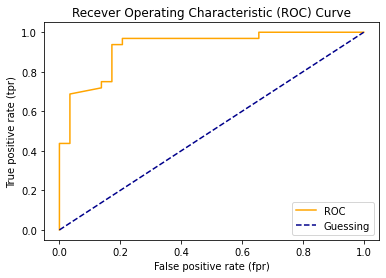

In [144]:
plot_roc_curve(fpr, tpr)

In [145]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9251077586206896

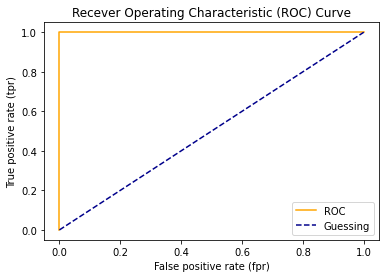

In [146]:
#plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [147]:
# perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Metrics**

A confusion matrix is a quick way to compare the label our model predicts and the actual labels it was suppose to predict.

In essence, giving you an idea of where the model is getting confused

In [148]:
from sklearn.metrics import confusion_matrix

In [149]:
y_preds= clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[24,  5],
       [ 4, 28]])

In [150]:
# Visualize confusion metrics with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual label"],
           colnames=["Predicted labels"])

Predicted labels,0,1
Actual label,,
0,24,5
1,4,28


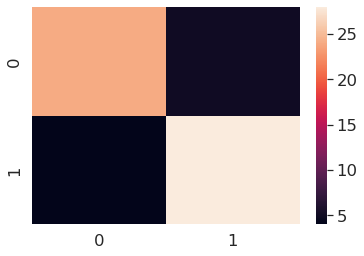

In [151]:
# Make our confusion matrix more visual with Seabor's heatmap()
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

#Create a confusion matrix
conf_mat= confusion_matrix(y_test, y_preds)

# plot it using Seaborn
sns.heatmap(conf_mat);

### Creating a confusion metrix using Scikit-Learn

To use the new methods of craeting  confusion matrix with scikit-Learn you will need sklearn version 1.0+

In [152]:
import sklearn
sklearn.__version__

'1.1.2'

In [153]:
conf_mat

array([[24,  5],
       [ 4, 28]])

In [154]:
import matplotlib.pyplot as plt

In [155]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

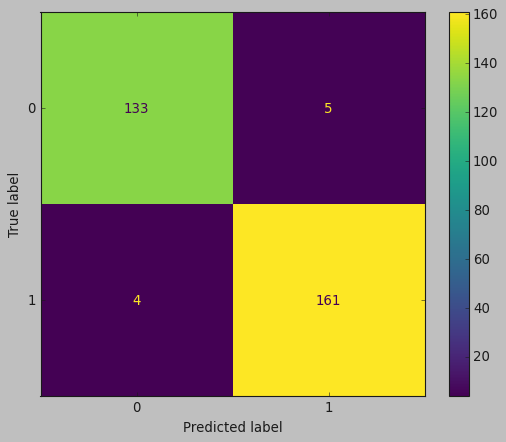

In [156]:
plt.style.use("classic")

from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y);

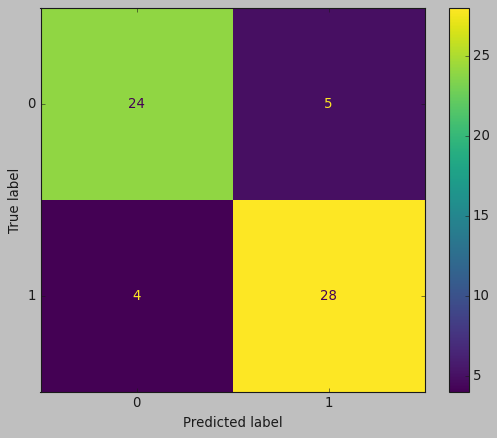

In [157]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,
                                       y_pred=y_preds)

**Classification Report**

In [158]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [159]:
# Where precision and recall becomes valuable
disease_true= np.zeros(1000)
disease_true[0]=1  # only one positive class

disease_preds= np.zeros(1000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

/home/olowu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/olowu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/olowu/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.9990,0.0,0.999,0.49950,0.998001
recall,1.0000,0.0,0.999,0.50000,0.999000
f1-score,0.9995,0.0,0.999,0.49975,0.998500
support,999.0000,1.0,0.999,1000.00000,1000.000000


In [160]:
disease_true

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### 4.2.2  Regression model evaluation metrics

model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

The ones we're going to cover are:

1. R^2 (pronoused as r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [161]:
# Import the useful algorithm
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create features and labels (x and y)
x= housing_df.drop("Target", axis=1)
y= housing_df["Target"]

# Let split our data into train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                  test_size=0.2)

# let build the model
model= RandomForestRegressor()

# let fit the model
model.fit (x_train, y_train)

RandomForestRegressor()

In [162]:
model.score(x_test, y_test)

0.8066196804802649

In [163]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: Target, Length: 4128, dtype: float64

In [164]:
y_test.mean()

2.0550030959302323

In [165]:
from sklearn.metrics import r2_score

# fill an array with y_test mean
y_test_mean= np.full(len(y_test), y_test.mean())

In [166]:
y_test_mean[:10], len(y_test_mean) 

(array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
        2.0550031, 2.0550031, 2.0550031, 2.0550031]),
 4128)

In [167]:
# If our model predicts he mean of our test data, we will have and r2-score of 0.0
r2_score(y_test, y_test_mean)

0.0

In [168]:
# If our model predicts everthing correctly, we will have and r2-score of 1.1
r2_score(y_true=y_test,
        y_pred=y_test)

1.0

**Mean absolute eror**

MAE is the average of the absolute diffrences between predictions and actual labels.

it gives you the ideal of how wrong your models predictions are

In [169]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds= model.predict(x_test)
mae= mean_absolute_error(y_true= y_test,
                        y_pred=y_preds)
mae

0.3265721842781009

In [170]:
y_preds

array([0.49384  , 0.75494  , 4.9285964, ..., 4.8363785, 0.71782  ,
       1.67901  ])

In [171]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: Target, Length: 4128, dtype: float64

In [172]:
# Let visualized it using pandas dataframe
df= pd.DataFrame({ "Actual value": y_test,
                  "Predicted value": y_preds
    
})

df.head()

,Actual value,Predicted value
20046,0.47700,0.493840
3024,0.45800,0.754940
15663,5.00001,4.928596
20484,2.18600,2.540290
9814,2.78000,2.331760


In [173]:
# Let create a diffrency column
df["diffrence"]= df["Predicted value"] - df["Actual value"]
df.head(10)

,Actual value,Predicted value,diffrence
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [174]:
# MAE using formulars and difference
np.abs(df["diffrence"]).mean()

0.3265721842781009

**Mean Squared error**

MSE is the mean of the square of the erro between actual and predicted values

In [175]:
from sklearn.metrics import mean_squared_error

y_preds= model.predict(x_test)
mse= mean_squared_error(y_true=y_test,
                       y_pred=y_preds)

mse

0.2534073069137548

In [176]:
# Let's visualized it using a pandas dataframe
df_mse= pd.DataFrame({
    "Actual value": y_test,
    "Predicted value": y_preds
})

df_mse.head(10)

,Actual value,Predicted value
20046,0.47700,0.493840
3024,0.45800,0.754940
15663,5.00001,4.928596
20484,2.18600,2.540290
9814,2.78000,2.331760
13311,1.58700,1.654970
7113,1.98200,2.343230
7668,1.57500,1.661820
18246,3.40000,2.474890
5723,4.46600,4.834478


In [177]:
# Let's add our diffrences column
df_mse["diffrence"]= df_mse["Actual value"] - df_mse["Predicted value"]
df_mse

,Actual value,Predicted value,diffrence
20046,0.47700,0.493840,-0.016840
3024,0.45800,0.754940,-0.296940
15663,5.00001,4.928596,0.071414
20484,2.18600,2.540290,-0.354290
9814,2.78000,2.331760,0.448240
...,...,...,...
15362,2.63300,2.220380,0.412620
16623,2.66800,1.947760,0.720240
18086,5.00001,4.836378,0.163632
2144,0.72300,0.717820,0.005180


In [178]:
df_mse["square_difference"]= np.square(df_mse["diffrence"])
df_mse.head()

,Actual value,Predicted value,diffrence,square_difference
20046,0.47700,0.493840,-0.016840,0.000284
3024,0.45800,0.754940,-0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.540290,-0.354290,0.125521
9814,2.78000,2.331760,0.448240,0.200919


In [179]:
np.square(df_mse["diffrence"]).mean()

0.2534073069137548

In [180]:
df_large_error = df_mse.copy()
df_large_error.iloc[0]["square_difference"] = 16
df_large_error

,Actual value,Predicted value,diffrence,square_difference
20046,0.47700,0.493840,-0.016840,16.000000
3024,0.45800,0.754940,-0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.540290,-0.354290,0.125521
9814,2.78000,2.331760,0.448240,0.200919
...,...,...,...,...
15362,2.63300,2.220380,0.412620,0.170255
16623,2.66800,1.947760,0.720240,0.518746
18086,5.00001,4.836378,0.163632,0.026775
2144,0.72300,0.717820,0.005180,0.000027


In [181]:
df_large_error.head()

,Actual value,Predicted value,diffrence,square_difference
20046,0.47700,0.493840,-0.016840,16.000000
3024,0.45800,0.754940,-0.296940,0.088173
15663,5.00001,4.928596,0.071414,0.005100
20484,2.18600,2.540290,-0.354290,0.125521
9814,2.78000,2.331760,0.448240,0.200919


In [182]:
# Calculate MSE with large errror
df_large_error["square_difference"].mean()

0.25728320720794084

In [183]:
df_large_error.reset_index(drop=True, inplace=True)

In [184]:
df_large_error

,Actual value,Predicted value,diffrence,square_difference
0,0.47700,0.493840,-0.016840,16.000000
1,0.45800,0.754940,-0.296940,0.088173
2,5.00001,4.928596,0.071414,0.005100
3,2.18600,2.540290,-0.354290,0.125521
4,2.78000,2.331760,0.448240,0.200919
...,...,...,...,...
4123,2.63300,2.220380,0.412620,0.170255
4124,2.66800,1.947760,0.720240,0.518746
4125,5.00001,4.836378,0.163632,0.026775
4126,0.72300,0.717820,0.005180,0.000027


In [185]:
# looks like it did not change much, let do it again
df_large_error.iloc[1:100]= 20
df_large_error

,Actual value,Predicted value,diffrence,square_difference
0,0.47700,0.493840,-0.016840,16.000000
1,20.00000,20.000000,20.000000,20.000000
2,20.00000,20.000000,20.000000,20.000000
3,20.00000,20.000000,20.000000,20.000000
4,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
4123,2.63300,2.220380,0.412620,0.170255
4124,2.66800,1.947760,0.720240,0.518746
4125,5.00001,4.836378,0.163632,0.026775
4126,0.72300,0.717820,0.005180,0.000027


In [186]:
# Calculate MSE with large errror
df_large_error["square_difference"].mean()

0.7333540351264799

In [187]:
# MAE using formulars and difference
np.abs(df_large_error["diffrence"]).mean()

0.7994451426841086

### 4.2.3 Finally using the **Scoring Parameter**

In [188]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

# set random seed 
np.random.seed(42)

# create x and y
x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

clf= RandomForestClassifier()

In [189]:
np.random.seed(42)

#Cross validation accuracy
cv_acc= cross_val_score(clf, x, y, cv=5, scoring=None) 
# If scoring =None, estimator's defaulf scoring evaluation metrics will be used
# for classification, the defaulf is accuracy
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [190]:
# Cross-validation accuracy
print(f"The cross-validation accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validation accuracy is: 82.48%


In [191]:
np.random.seed(42)
cv_acc= cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [192]:
# Cross-validation accuracy
print(f"The cross-validation accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validation accuracy is: 82.48%


In [193]:
np.random.seed(42)
cv_precision= cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [194]:
# Cross-validation precition
print(f"The cross-validation precision is: {np.mean(cv_precision)}")

The cross-validation precision is: 0.8329547346025924


In [195]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, x, y, scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [196]:
# Cross-validation accuracy
print(f"The cross-validation recall is: {np.mean(cv_recall)}")

The cross-validation recall is: 0.8545454545454545


Let's see the `scoring` parameter being used on regression problem

In [197]:
# Import the useful algorithm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


np.random.seed(42)

# create features and labels (x and y)
x= housing_df.drop("Target", axis=1)
y= housing_df["Target"]


# let build the model
model= RandomForestRegressor()


In [198]:
np.random.seed(42)
cv_r2= cross_val_score(model, x, y, cv=3)
cv_r2

array([0.62159677, 0.72076221, 0.62136792])

In [199]:
np.mean(cv_r2)

0.6545756342466266

In [200]:
# Mean squared error
np.random.seed(42)
cv_mse = cross_val_score(model, x, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([-0.51906307, -0.34788294, -0.37112854, -0.44980156, -0.4626866 ])

In [201]:
np.mean(cv_mse)

-0.43011254261460774

In [202]:
# Mean absolute error
np.random.seed(42)
cv_mae = cross_val_score(model, x, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-0.54255936, -0.40903449, -0.43716367, -0.46911343, -0.47319069])

In [203]:
np.mean(cv_mae)

-0.4662123287693799

## 4.3 Using diffrent evaluation metric as Scikit-Learn funtions

The thrid way to evaluate our models/estimators is by usind the `sklearn.metrics`

In [213]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Let create our features and lables
x= heart_disease.drop("target", axis=1)
y= heart_disease["target"]

# let split our data into training and test set
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

# Let build our model
clf= RandomForestClassifier()

# let fit our model
clf.fit(x_train, y_train)

# let make prediction on our model
y_preds= clf.predict(x_test)

# let evalute our model
print(f"Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test, y_preds) *100:.2f}% ")
print(f"Precision score: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1-Score: {f1_score(y_test, y_preds)} ")

Classifier metrics on the test set
Accuracy: 85.25% 
Precision score: 0.8484848484848485
Recall: 0.875
F1-Score: 0.8615384615384615 


In [207]:
# Let make predictions with our model
y_preds= clf.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0])

In [208]:
accuracy_score(y_true=y_test,
              y_pred=y_preds)

0.8688524590163934

In [214]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create x and y
x= housing_df.drop("Target", axis=1)
y= housing_df["Target"]

# let split our data into train and test set
x_train, x_test, y_train, y_test= train_test_split(x, y,
                                                  test_size=0.2)

# let build our model
model= RandomForestRegressor()
# let fit our model
model.fit(x_train, y_train)

# let make predictions with our model 
y_preds= model.predict(x_test)

#let evaluate our model
print("Model evaluation with diffrent metrics")
print(f"R2 SCORE:{r2_score(y_test, y_preds)} ")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)} ")

Model evaluation with diffrent metrics
R2 SCORE:0.8066196804802649 
MAE: 0.3265721842781009
MSE: 0.2534073069137548 


## 5. Improving a model

first prediction are refers to as baseline predictions
first model is refers to as baseline model

how to improve a model
from a data perspective
* Could we collect more data? (generally, the more data the better the model can learn )

* could we improve our data?

from a model perspertive:
* is there a better model we could use
* Could we improve the current model ?

Hyperparameter vs Parameter

* Parameter = model find these pattens in dats
* Hyperparameter= settings on a model you can adjust to (potentially) improve its ability tor find patterns

Three ways to adjust hyperparameter
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [215]:
from sklearn.ensemble import RandomForestClassifier

clt= RandomForestClassifier()

In [217]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Turning hyperparameter by hand

Let's make 3 sets, training, validation and testing

In [219]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

we're going to try and adjust the following

1. `max_depth`
2. `max_features`
3. `min_sample_leaf`
4. `min_sample_split`
5. `n_estimator`


In [232]:
def evaluation_preds(y_true, y_preds):
    """
    performs evaluation comparison on y_true lables vs y_preds labels
    on our classification.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall= recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    # let return our elaluation in a dictionary
    metric_dict = {
        "Accuracy": round(accuracy, 2),
        "Precision": round(precision, 2),
        "Recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f} ")
    
    return metric_dict

In [226]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [233]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled= heart_disease.sample(frac=1)

# split the shuffled data into train and test
x= heart_disease_shuffled.drop("target", axis=1)
y= heart_disease_shuffled["target"]

# split the data into train, validation and test
train_split = round(0.7 * len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
x_train, y_train= x[:train_split], y[:train_split]
x_valid, y_valid= x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test= x[valid_split:], y[valid_split:]

clf= RandomForestClassifier()
clf.fit(x_train, y_train)

# make baseline prediction
y_preds= clf.predict(x_valid)

# Evaluate the classifier on validation data
baseline_metrics= evaluation_preds(y_valid, y_preds)

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85 


In [230]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [234]:
np.random.seed(42)

# Create a secong classifier with diffrent hyperparameter
clf_2= RandomForestClassifier()
clf_2.fit(x_train, y_train)

# make baseline prediction
y_preds_2= clf.predict(x_valid)

# Evaluate the  second classifier on validation data
clf_2_metrics= evaluation_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 0.81
Recall: 0.88
F1 score: 0.85 


In [235]:
np.random.seed(42)

# Create a secong classifier with diffrent hyperparameter
clf_3= RandomForestClassifier(n_estimators=100,
                             max_depth=10)
clf_3.fit(x_train, y_train)

# make baseline prediction
y_preds_3= clf_3.predict(x_valid)

# Evaluate the  second classifier on validation data
clf_3_metrics= evaluation_preds(y_valid, y_preds_3)

Acc: 80.00%
Precision: 0.81
Recall: 0.84
F1 score: 0.82 


### 5.2 Hyperparameter tuning wit RandomizedSearchCV

In [244]:
from sklearn.model_selection import RandomizedSearchCV

grid= {"n_estimators": [10, 100, 200, 500, 1000, 12000],
      "max_depth":[None, 5, 10, 20, 30],
      "max_features": ["sqrt"],
      "min_samples_split": [2, 4, 6],
      "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# split into x and y
x= heart_disease_shuffled.drop("target", axis=1)
y= heart_disease_shuffled["target"]

# split into train and test set
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf= RandomForestClassifier(n_jobs=-1)

# Setup RandomizedSearchCV

rs_clf= RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=20,
                          cv=5,
                          verbose=2)

# fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=12000; total time=  17.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=12000; total time=  13.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=12000; total time=  12.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=12000; total time=  12.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=12000; total time=  12.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_est

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 12000]},
                   verbose=2)

In [245]:
# let check the combination with the best result
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [246]:
# Make predictions with the best hyperparameter
rs_y_preds=rs_clf.predict(x_test)

# Evaluate the prediction
rs_metrics= evaluation_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81 


### 5.3 Hyperparameter tuning with GridSearchCV

In [247]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 12000],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [250]:
grid_2 = {'n_estimators': [100, 200, 500],
          'max_depth': [None],
          'max_features': ['sqrt'],
          'min_samples_split': [6],
          'min_samples_leaf': [1, 2]}

In [248]:
3*1*1*1*2*5

30

In [252]:
from sklearn.model_selection import GridSearchCV

np.random.seed(42)

# split into x and y
x= heart_disease_shuffled.drop("target", axis=1)
y= heart_disease_shuffled["target"]

# split into train and test set
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf= RandomForestClassifier(n_jobs=-1)

# Setup GridSearchCV

gs_clf= GridSearchCV(estimator=clf,
                     param_grid=grid_2,
                     cv=5,
                     verbose=2)

# fit the GridSearchCV version of clf
gs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   1.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1),
             param_grid={'max_depth': [None], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [253]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [255]:
# Make predictions with the best hyperparameter
gs_y_preds=gs_clf.predict(x_test)

# Evaluate the prediction
gs_metrics= evaluation_preds(y_test, gs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81 


Let's compare our diffrent model metrics

In [266]:
compare_metrics= pd.DataFrame({"baseline": baseline_metrics,
                              "clf_2": clf_2_metrics,
                               "clf_3": clf_3_metrics,
                              "random_search": rs_metrics,
                              "grid_search": gs_metrics})

In [259]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [267]:
compare_metrics

,baseline,clf_2,clf_3,random_search,grid_search
Accuracy,0.82,0.82,0.80,0.82,0.82
Precision,0.81,0.81,0.81,0.77,0.77
Recall,0.88,0.88,0.84,0.86,0.86
f1,0.85,0.85,0.82,0.81,0.81


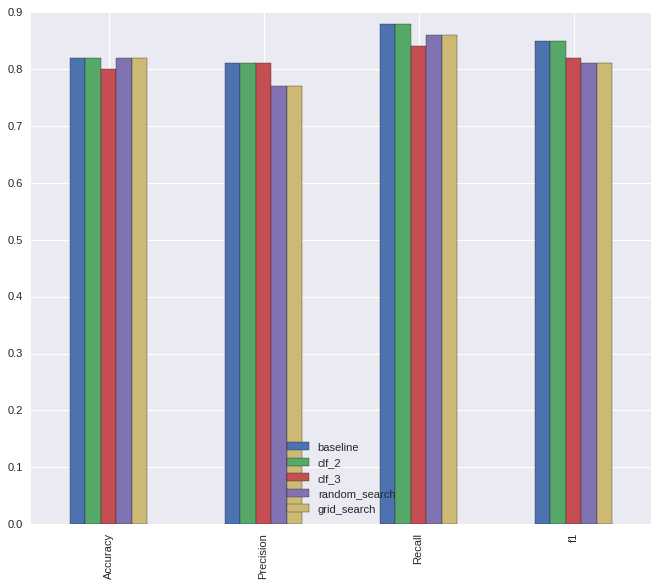

In [268]:
plt.style.use('seaborn')
compare_metrics.plot.bar(figsize= (10, 8));

## 6. Saving and loading saved machine models

Two ways of saving and loading machine learning models:

1. with Python's `pickle` module
2. with the `joblib` module

**Pickle**

In [269]:
import pickle

# Save and extisting model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [270]:
# LOad a saved model
loaded_pickle_model= pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [271]:
# Make some prediction
pickle_preds= loaded_pickle_model.predict(x_test)

evaluation_preds(y_test, pickle_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81 


{'Accuracy': 0.82, 'Precision': 0.77, 'Recall': 0.86, 'f1': 0.81}

**Joblib**

In [273]:
from joblib import dump, load

# Save model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [274]:
loaded_jop_model=load(filename="gs_random_forest_model_1.joblib")

In [275]:
# make and evalute joblib prediction
# Make some prediction
joblib_y_preds= loaded_pickle_model.predict(x_test)

evaluation_preds(y_test, joblib_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81 


{'Accuracy': 0.82, 'Precision': 0.77, 'Recall': 0.86, 'f1': 0.81}

### 7. Putting it all together

In [276]:
# let load in the data
data= pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [277]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [278]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

steps we want to do all in one cel

1. fill missing data
2. convert data to numbers
3. Build a modelon the data

In [282]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Building model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

#Importing data and drop rows with missing value
data= pd.read_csv("data/car-sales-extended-missing-data.csv")
data= data.dropna(subset=["Price"])

# Define differnt features and transformer pipeline
categorical_features= ["Make", "Colour"]
categorical_transformer= Pipeline(steps= [
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
      
])
door_feature= ["Doors"]
door_transformer= Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))
])

numeric_features= ["Odometer (KM)"]
numeric_transformer=  Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
]) 

# Setup the preprocessing steps(fill missing value, then convert to numbers )
preprocessor= ColumnTransformer(
                              transformers=[
                                  ("cat", categorical_transformer, categorical_features),
                                  ("door", door_transformer, door_feature),
                                  ("num", numeric_transformer, numeric_features)
                              ])

# Creating a prepossing and modelling pipeline
model= Pipeline(steps=[
    ("preprosessor", preprocessor),
    ("model", RandomForestRegressor())
])

#split data
x= data.drop("Price", axis=1)
y= data["Price"]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

# Fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.22188417408787875

It's also possible to use `GridSearchCV` or `RandomizedSearchCV` with `pipeline`

In [284]:
# Use GridSearchCV wiht our regrssion pipeline
pipe_grid= {
    "preprosessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model= GridSearchCV(model, pipe_grid, cv=2, verbose=2)
gs_model.fit(x_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprosessor__num__imputer__strategy=mean; total time=   0.4s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprosessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprosessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprosessor__num__imputer__strategy=median; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprosessor__num__imputer__strategy=mean; total time=   1.7s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprosessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprosessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [285]:
gs_model.score(x_test, y_test)

0.2895355108737422